只需下載一次

In [ ]:
! wget https://storage.googleapis.com/2018-pixnet-hackathon_opendata/pixfood20.tar.gz
! wget https://storage.googleapis.com/2018-pixnet-hackathon_opendata/top_articles_200k.jl.gz
! wget https://storage.googleapis.com/2018-pixnet-hackathon_opendata/samples.jl

只需解壓縮一次 (about 10 mins)

In [ ]:
! tar -zxf pixfood20.tar.gz
! gunzip -k top_articles_200k.jl.gz

重建 server 後需重安裝 jsonlines

In [ ]:
! pip install jsonlines

## from JSON to Python numpy.ndarray

In [1]:
import jsonlines
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 100 posts of samples.jl from JSON to Python dict
samples_json_dict = []
with jsonlines.open('samples.jl') as reader:
    for obj in reader:
        samples_json_dict.append(obj)
len(samples_json_dict)

100

In [3]:
# GET all images in 100 posts. It takes 15 mins.
images = []
for post in samples_json_dict:
    for url in post['images']:
        r = requests.get(url, stream=True)
        if r.status_code == 200:
            try:
                img = plt.imread(r.raw, format='JPG')
                images.append(img)
            except OSError:
                print('OSError:', url)
print('GET', len(images), 'images')

OSError: https://www.eki-net.com/pc/personal/yoyaku/wb/img/b_seat_sankaku_s.png
OSError: https://www.eki-net.com/pc/personal/yoyaku/wb/img/b_seat_sankaku_s.png
OSError: https://www.eki-net.com/pc/personal/yoyaku/wb/img/b_seat_maru_l.gif
OSError: http://adcenter.conn.tw/track/oeya_url_image.php?key=20f5416c32e05cb322b1f3e4bd43e0d4
OSError: http://badges.instagram.com/static/images/ig-badge-16.png
GET 3278 images


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


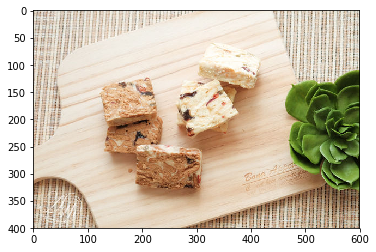

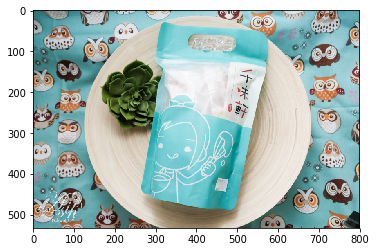

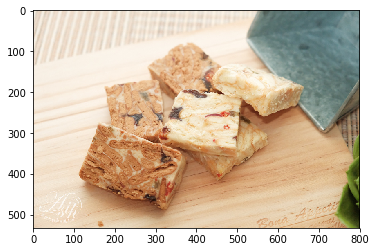

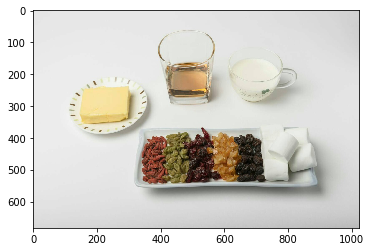

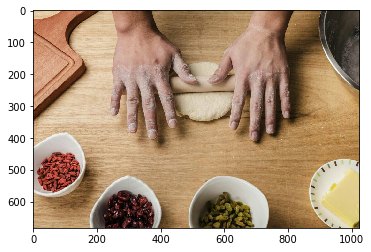

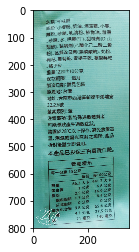

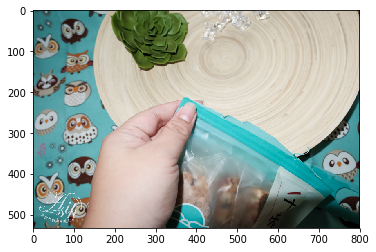

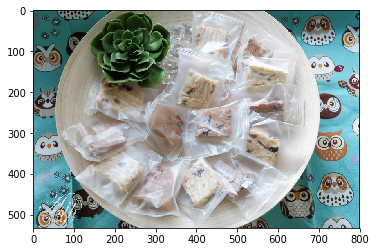

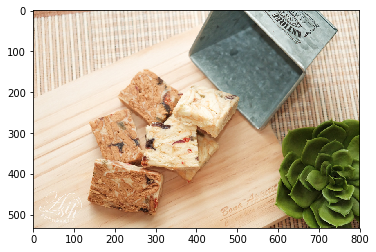

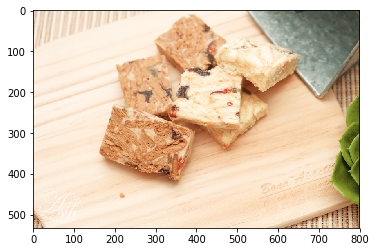

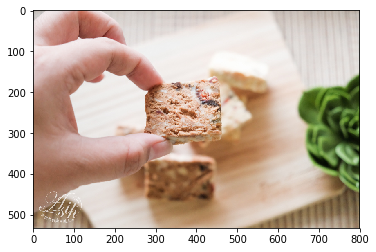

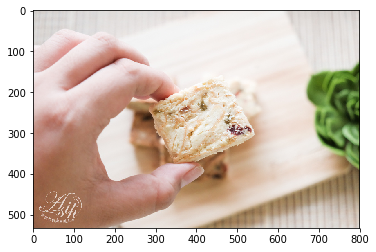

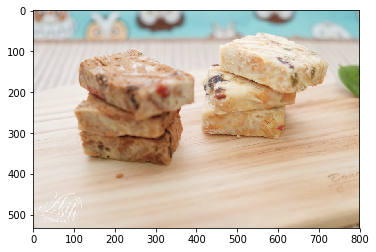

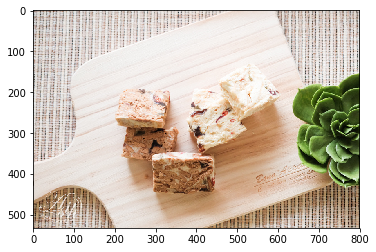

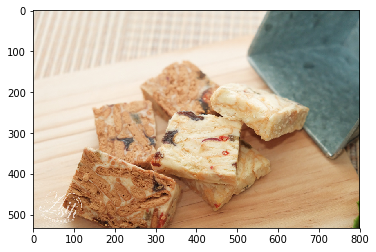

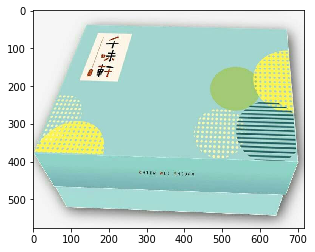

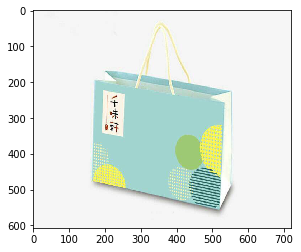

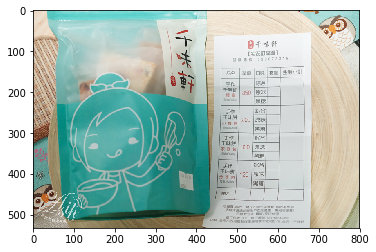

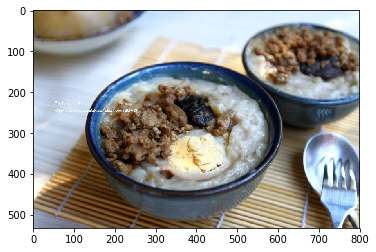

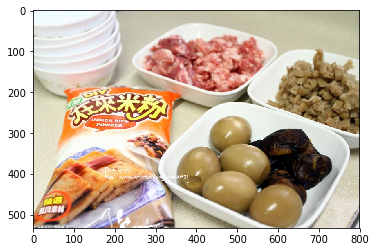

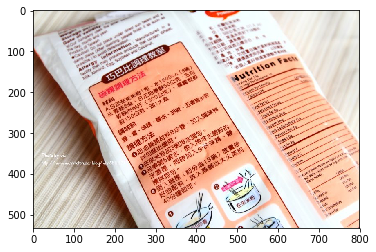

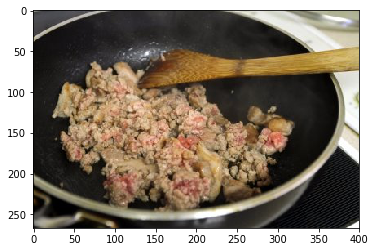

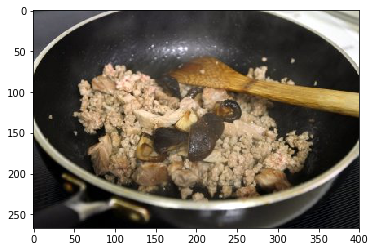

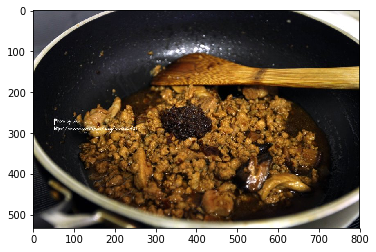

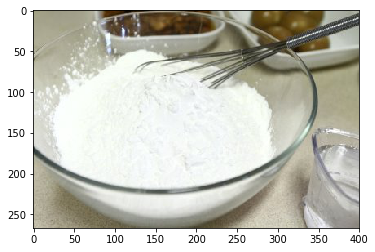

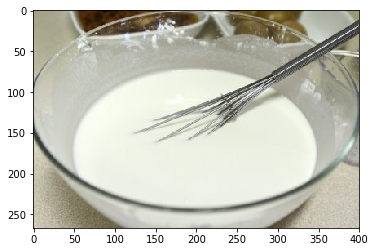

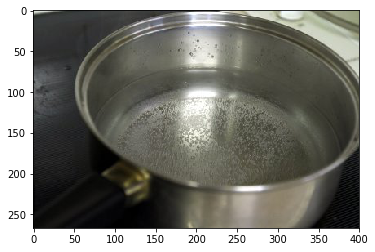

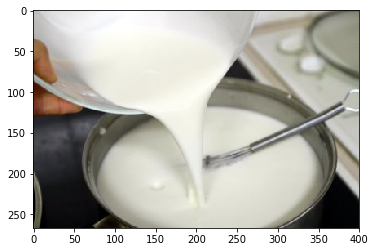

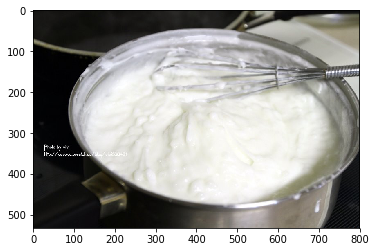

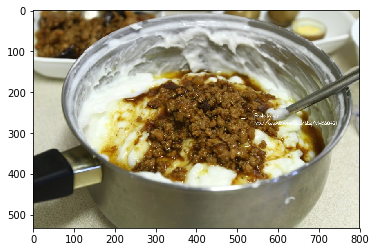

In [4]:
# show some images
for img in images[:30]:
    plt.subplots()[1].imshow(img)